# **GRIP** 
# **The Sparks Foundation**
# Task 2:
# Prediction using UnSupervised ML


## **By: Suryakumar.B**

In [ ]:
# Importing the libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [ ]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)

print('Data imported sucessfully. \n')

df.head()

Data imported sucessfully. 



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


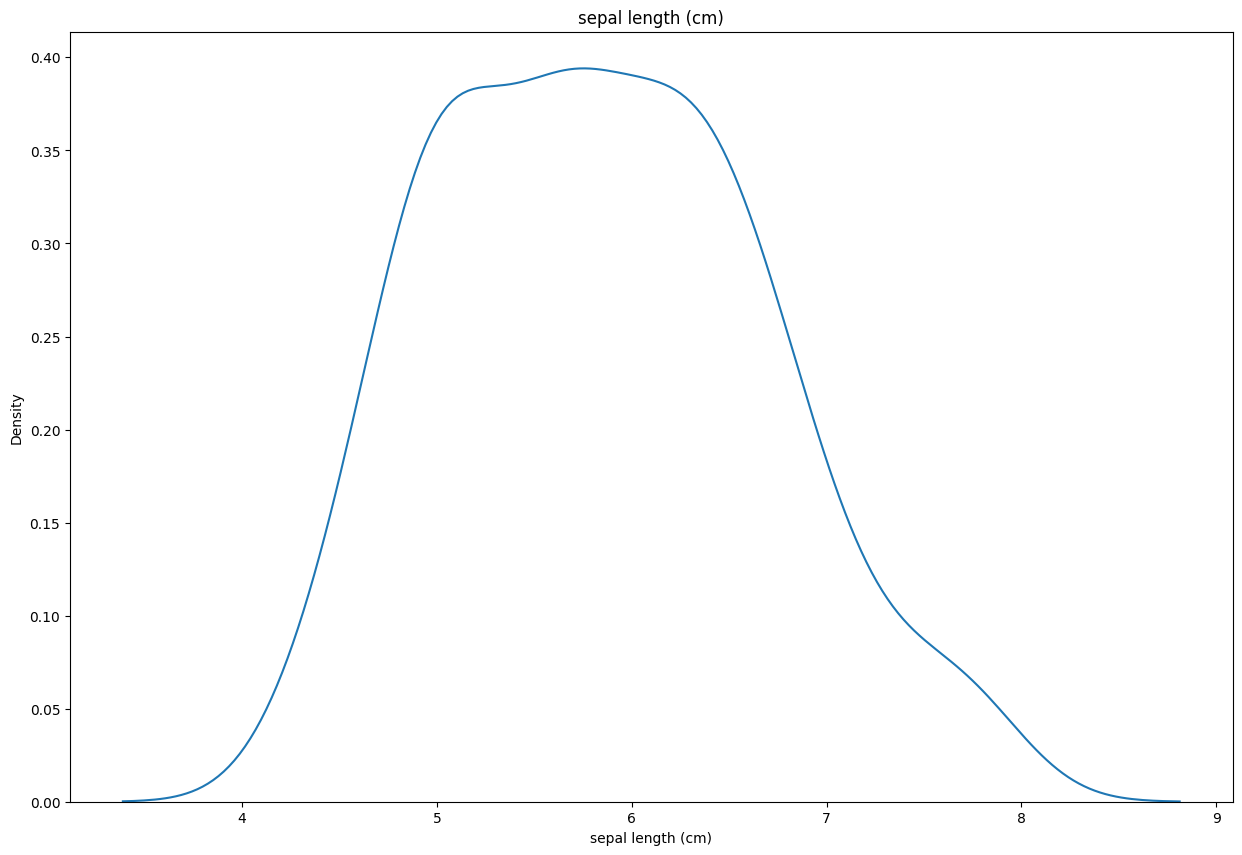

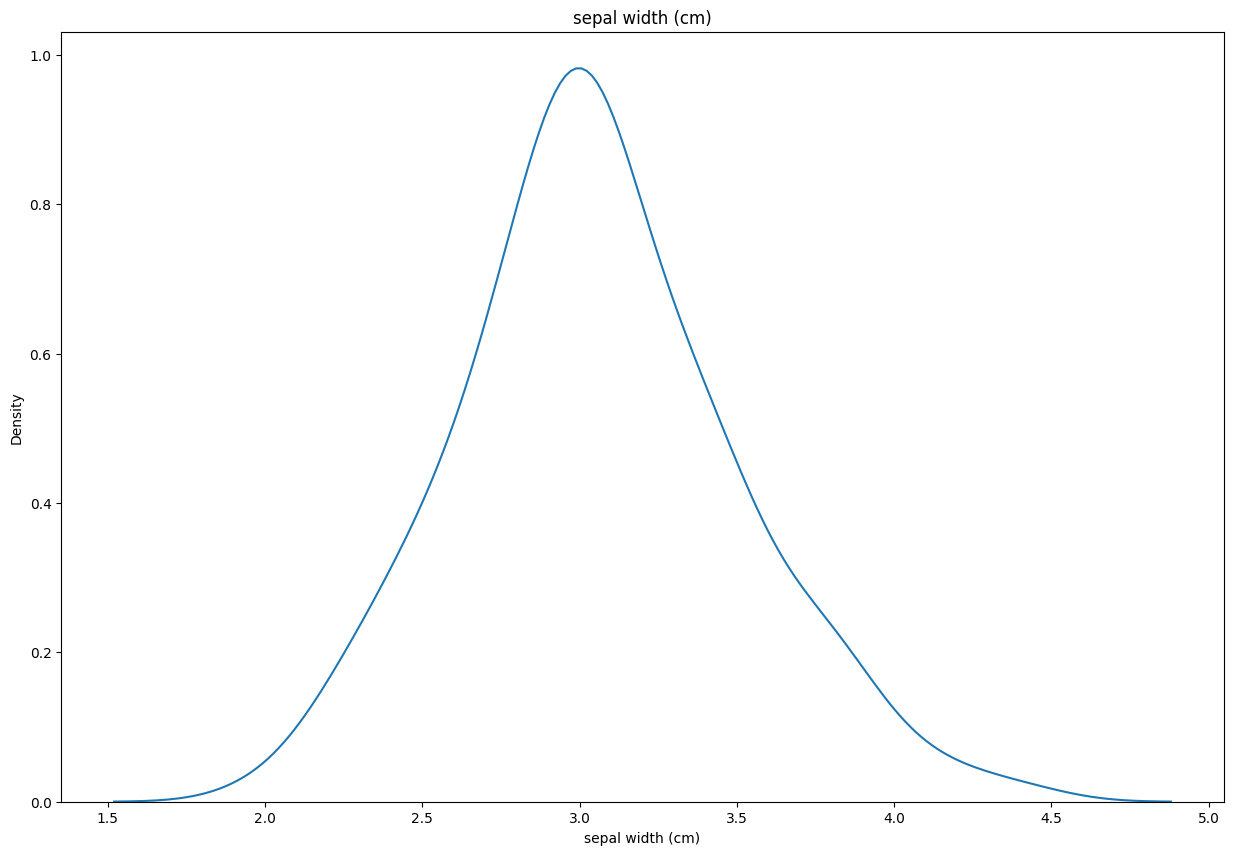

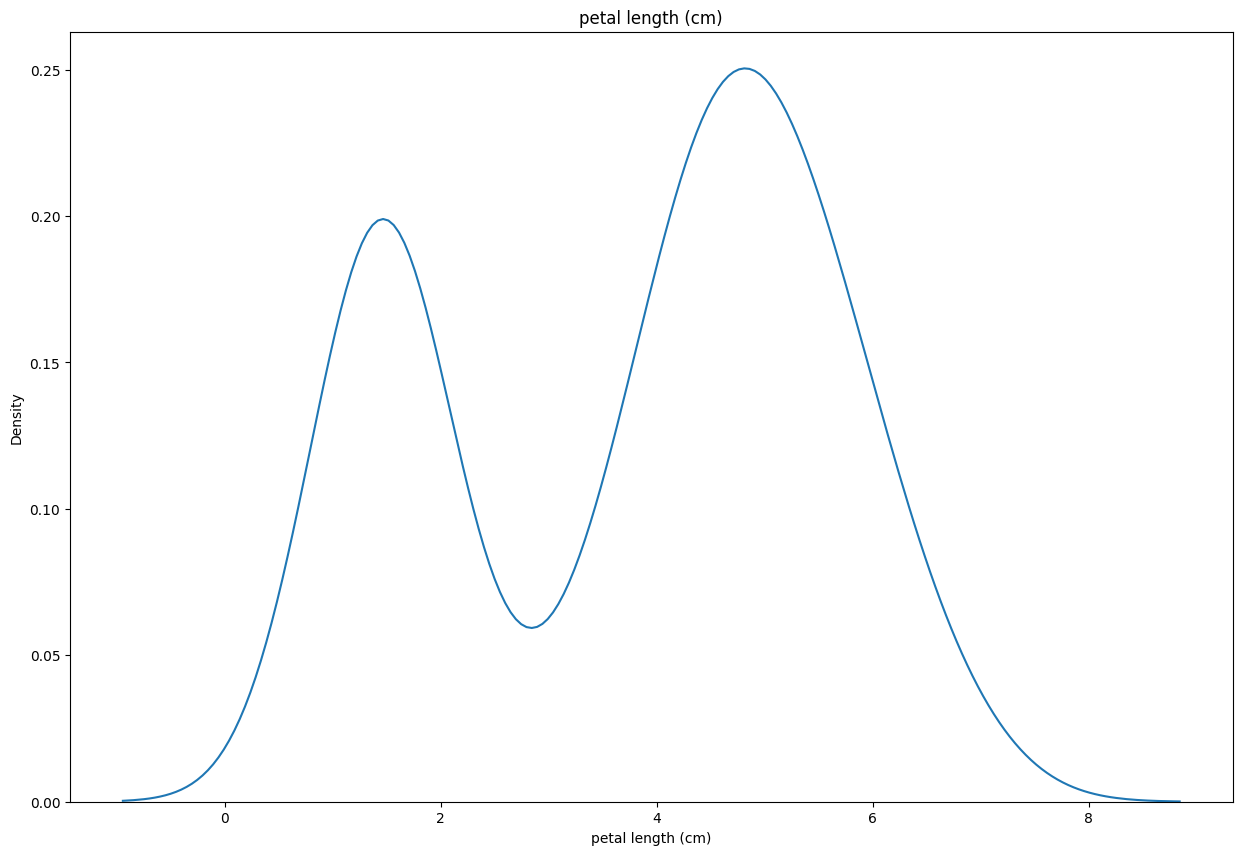

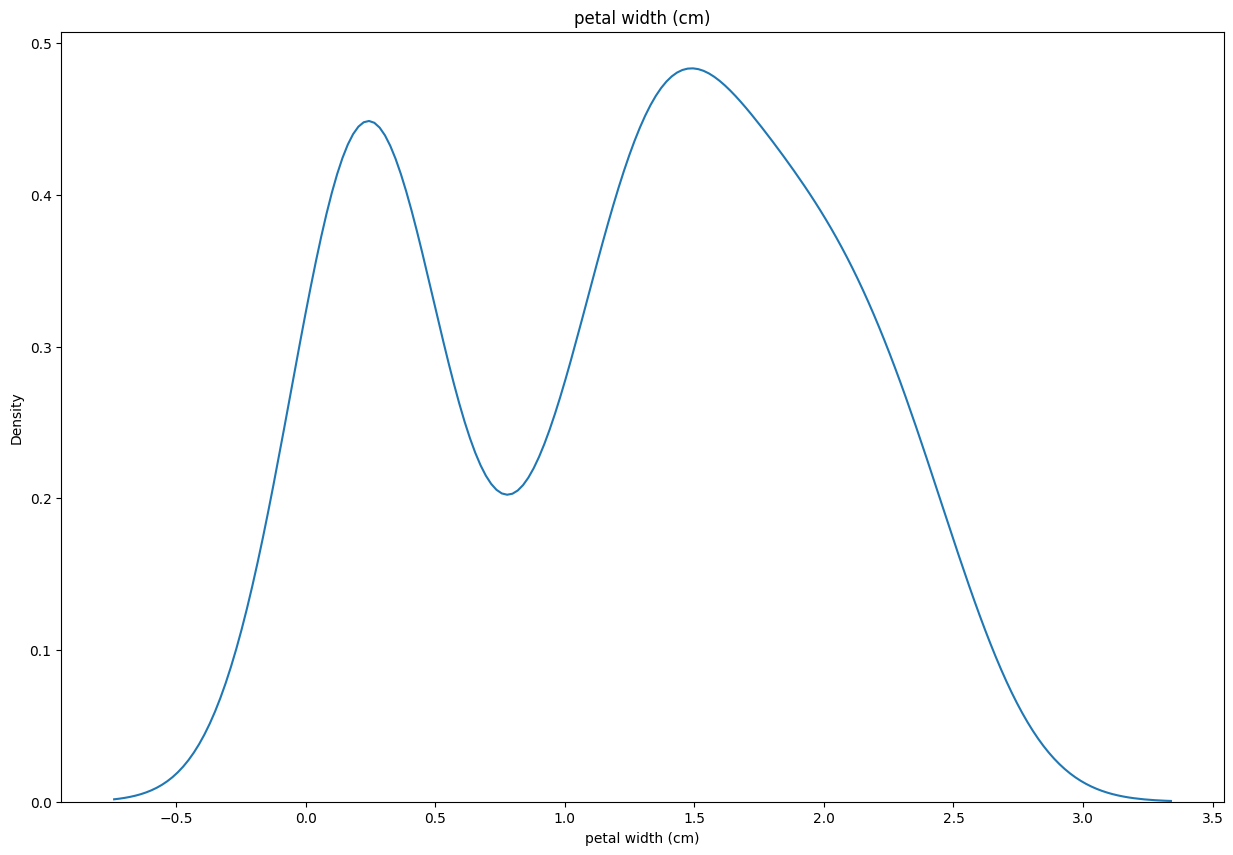

In [ ]:
for i in df.columns:
  plt.figure(figsize=(15,10))
  sns.kdeplot(df[i])
  plt.title(i)
  plt.show()

In [ ]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
sc=StandardScaler()

for i in df.columns:
  sc.fit(df[[i]])
  df[i]=sc.transform(df[[i]])

In [ ]:
df.skew()

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64

In [ ]:
cluster=[]
for i in range(2,10):
  km=KMeans(n_clusters=i,random_state=0).fit(df)
  cluster.append(km.inertia_)

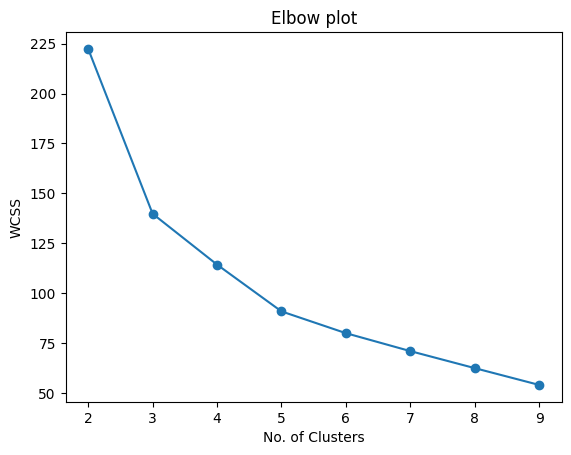

In [ ]:
plt.plot(range(2,10),cluster,marker='o')
plt.title('Elbow plot')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

**From the above plot we choose the optimal number of cluster as `5`.**


In [ ]:
km=KMeans(n_clusters=5,random_state=0).fit(df)
y=km.fit_predict(df)

In [ ]:
y

array([1, 4, 4, 4, 1, 1, 4, 1, 4, 4, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 4, 4, 1, 1, 1, 4, 4, 1, 1, 1, 4, 4, 1, 1, 4, 1, 1, 4, 4, 1,
       1, 4, 1, 4, 1, 4, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0,
       3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 2, 3, 2, 3, 2, 2, 0, 2, 3, 2,
       2, 3, 2, 0, 3, 2, 3, 2, 2, 0, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2,
       3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3], dtype=int32)

In [ ]:
df['Target']=y

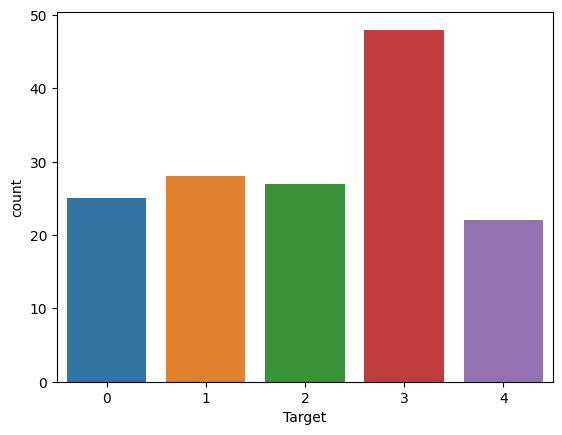

In [ ]:
sns.countplot(x=df['Target'])
plt.show()

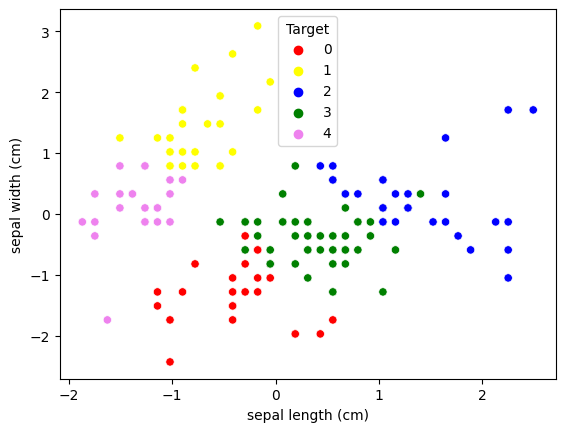

In [ ]:
sns.scatterplot(x=df['sepal length (cm)'],y=df['sepal width (cm)'],hue=df['Target'],
                palette=['red','yellow','blue','green','violet'])
plt.show()

**Since, the dataset doesnot have the target variable we can use clustering algorithm to find the optimal number of clusters. But to find the clusters explanation we need a deep analysis on the dataset and we need a domain experts helps to find the cluster explanation which may take more time period.**